In [1]:
import os

In [2]:
import glob

In [3]:
import btrack

In [4]:
from skimage.io import imread, imshow

In [5]:
def image_generator(files, crop = None):
    """
    Generator function for iterative procesessing of image files
    """
    
    if crop is None:
        for filename in files:
            img = imread(filename)
            yield img
    else:
        for filename in files:
            img = imread(filename)
            img = crop_image(img, crop)
            yield img

# Counting cells

Go in each position directory, load masks, count cells, plot

In [6]:
root_dir = '/home/nathan/data/kraken/ras'

In [7]:
## all competitive 90:10, 99:1 wt ras expts

expts_9010 = {'ND0010':[10, 11],
         'ND0011':[6, 7], 
         'ND0012':[3, 4, 6, 7, 8, 9, 10],
         'ND0013':[3, 4, 5, 6, 7, 8, 9, 10]
        }
expts_9901 = {'ND0010':[6, 7],
         'ND0011':[], 
         'ND0012':[5],
         'ND0013':[]
        }

expts_control_9010 = {'ND0010':[8, 9],
         'ND0011':[4, 5], 
         'ND0012':[1 ,2],
         'ND0013':[2]
        }
expts_control_9901 = {'ND0010':[4, 5],
         'ND0011':[], 
         'ND0012':[],
         'ND0013':[]
        }



In [6]:
expts_9010

{'ND0010': [10, 11],
 'ND0011': [6, 7],
 'ND0012': [3, 4, 6, 7, 8, 9, 10],
 'ND0013': [3, 4, 5, 6, 7, 8, 9, 10]}

#### check masks first

In [7]:
import napari
napari.__version__

'0.4.11'

In [8]:
from octopuslite import DaskOctopusLiteLoader

#### check single expt pos masks

In [9]:
experiment_dir = f'{root_dir}/ND0010/Pos5/Pos5_images'

In [10]:
images = DaskOctopusLiteLoader(experiment_dir)

In [ ]:
viewer = napari.Viewer()
viewer.add_image(images['irfp'], blending='additive', contrast_limits=[0,255])
viewer.add_image(images['mask'], blending= 'additive', contrast_limits=[0,2])

##### iterate through many positions checking images

In [ ]:
expt_type = expts_control_9010 # expts_9910
for expt in expt_type: #['ND0010']:#
    for pos in expt_type[expt]:#[10, 11]:#
        experiment_dir = f'{root_dir}/{expt}/Pos{pos}/Pos{pos}_images'
        images = DaskOctopusLiteLoader(experiment_dir, crop = (1200, 1600))
        print(experiment_dir)
        viewer = napari.Viewer()
        viewer.add_image(images['irfp'], blending='additive', contrast_limits=[10,110], colormap = 'green')
        viewer.add_image(images['rfp'], blending='additive', contrast_limits=[0,50], colormap = 'red')
        viewer.add_image(images['mask'], blending= 'additive', contrast_limits=[0,2], colormap = 'inferno', opacity = 0.5)
        viewer.show(block=True)

# Counting cells - filtering for expts currently segmented well

object files? or images

In [22]:
expts_9010_filt = {'ND0010':[10, 11],
         'ND0011':[6, 7], 
         #'ND0012':[3, 4, 6, 7, 8, 9, 10],
         #'ND0013':[3, 4, 5, 6, 7, 8, 9, 10]
        }
expts_9901_filt = {'ND0010':[6, 7],
        # 'ND0011':[], 
         #'ND0012':[5],
         #'ND0013':[]
        }

expts_control_9010_filt = {'ND0010':[8, 9],
         'ND0011':[4, 5], 
        # 'ND0012':[1 ,2],
         #'ND0013':[2]
        }
expts_control_9901_filt = {'ND0010':[4, 5],
       #  'ND0011':[], 
        # 'ND0012':[],
        # 'ND0013':[]
        }

In [11]:
expt_type = expts_9010

In [12]:
for expt in expt_type: #['ND0010']:#
    for pos in expt_type[expt]:#[10, 11]:#
        obj_path = f'{root_dir}/{expt}/Pos{pos}/*object*'
        if glob.glob(obj_path):
            print(obj_path, 'exists')

/home/nathan/data/kraken/ras/ND0010/Pos10/*object* exists
/home/nathan/data/kraken/ras/ND0010/Pos11/*object* exists
/home/nathan/data/kraken/ras/ND0011/Pos6/*object* exists
/home/nathan/data/kraken/ras/ND0011/Pos7/*object* exists


In [41]:
objects = {}
for expt in expt_type: #['ND0010']:#
    for pos in expt_type[expt]:#[10, 11]:#
        obj_path = f'{root_dir}/{expt}/Pos{pos}/*object*'
        if glob.glob(obj_path):
            print(glob.glob(obj_path))
            with btrack.dataio.HDF5FileHandler(
                 glob.glob(obj_path)[0], 'r', obj_type='obj_type_2',
            ) as hdf:
                objs = hdf.objects
        objects[f'{expt}/{pos}'] = objs

[INFO][2022/02/03 06:36:05 pm] Opening HDF file: /home/nathan/data/kraken/ras/ND0010/Pos10/objects.h5...
[INFO][2022/02/03 06:36:05 pm] Loading objects/obj_type_2 (1191, 5) (1191 filtered: None)
[INFO][2022/02/03 06:36:05 pm] Closing HDF file: /home/nathan/data/kraken/ras/ND0010/Pos10/objects.h5
[INFO][2022/02/03 06:36:05 pm] Opening HDF file: /home/nathan/data/kraken/ras/ND0010/Pos11/objects.h5...


['/home/nathan/data/kraken/ras/ND0010/Pos10/objects.h5']
['/home/nathan/data/kraken/ras/ND0010/Pos11/objects.h5']


[INFO][2022/02/03 06:36:05 pm] Loading objects/obj_type_2 (1189, 5) (1189 filtered: None)
[INFO][2022/02/03 06:36:05 pm] Closing HDF file: /home/nathan/data/kraken/ras/ND0010/Pos11/objects.h5


# checking out nd10pos11

In [52]:
with btrack.dataio.HDF5FileHandler(
     '/home/nathan/data/kraken/ras/ND0010/Pos11/objects_type_2.h5', 'r', obj_type='obj_type_2',
) as hdf:
    rfp_objs = hdf.objects
with btrack.dataio.HDF5FileHandler(
     '/home/nathan/data/kraken/ras/ND0010/Pos11/objects_type_1.h5', 'r', obj_type='obj_type_1',
) as hdf:
    gfp_objs = hdf.objects

[INFO][2022/02/03 07:23:04 pm] Opening HDF file: /home/nathan/data/kraken/ras/ND0010/Pos11/objects_type_2.h5...
[INFO][2022/02/03 07:23:04 pm] Loading objects/obj_type_2 (1189, 5) (1189 filtered: None)
[INFO][2022/02/03 07:23:04 pm] Closing HDF file: /home/nathan/data/kraken/ras/ND0010/Pos11/objects_type_2.h5
[INFO][2022/02/03 07:23:04 pm] Opening HDF file: /home/nathan/data/kraken/ras/ND0010/Pos11/objects_type_1.h5...
[INFO][2022/02/03 07:23:04 pm] Loading objects/obj_type_1 (1351, 5) (1351 filtered: None)
[INFO][2022/02/03 07:23:04 pm] Closing HDF file: /home/nathan/data/kraken/ras/ND0010/Pos11/objects_type_1.h5


In [53]:
len(gfp_objs)

1351

In [54]:
len(rfp_objs)

1189

# checking out nd10pos5 (99:1)

In [55]:
with btrack.dataio.HDF5FileHandler(
     '/home/nathan/data/kraken/ras/ND0010/Pos5/objects_type_2.h5', 'r', obj_type='obj_type_2',
) as hdf:
    rfp_objs = hdf.objects
with btrack.dataio.HDF5FileHandler(
     '/home/nathan/data/kraken/ras/ND0010/Pos5/objects_type_1.h5', 'r', obj_type='obj_type_1',
) as hdf:
    gfp_objs = hdf.objects

[INFO][2022/02/03 07:26:22 pm] Opening HDF file: /home/nathan/data/kraken/ras/ND0010/Pos5/objects_type_2.h5...
[INFO][2022/02/03 07:26:22 pm] Loading objects/obj_type_2 (1188, 5) (1188 filtered: None)
[INFO][2022/02/03 07:26:22 pm] Closing HDF file: /home/nathan/data/kraken/ras/ND0010/Pos5/objects_type_2.h5
[INFO][2022/02/03 07:26:22 pm] Opening HDF file: /home/nathan/data/kraken/ras/ND0010/Pos5/objects_type_1.h5...
[INFO][2022/02/03 07:26:23 pm] Loading objects/obj_type_1 (2391, 5) (2391 filtered: None)
[INFO][2022/02/03 07:26:23 pm] Closing HDF file: /home/nathan/data/kraken/ras/ND0010/Pos5/objects_type_1.h5


In [58]:
gfp_objs[0]

,ID,x,y,z,t,dummy,states,label,prob,area,max_intensity,prob_anaphase,prob_apoptosis,prob_interphase,prob_metaphase,prob_prometaphase
0,0,758.145508,574.839844,0.0,0,False,0,4,0.0,32600.0,1.0,0.000041,0.999946,6.299553e-08,0.000013,2.037653e-09


# count segments in each image

In [8]:
import matplotlib.pyplot as plt

In [9]:
import scipy.ndimage as nd

In [22]:
import numpy as np

In [10]:
mask_files = sorted(glob.glob('/home/nathan/data/kraken/ras/ND0013/Pos3/Pos3_images/*channel099*'))

In [34]:
mask_files

['/home/nathan/data/kraken/ras/ND0013/Pos3/Pos3_images/img_channel099_position003_time000000000_z000.tif',
 '/home/nathan/data/kraken/ras/ND0013/Pos3/Pos3_images/img_channel099_position003_time000000001_z000.tif',
 '/home/nathan/data/kraken/ras/ND0013/Pos3/Pos3_images/img_channel099_position003_time000000002_z000.tif',
 '/home/nathan/data/kraken/ras/ND0013/Pos3/Pos3_images/img_channel099_position003_time000000003_z000.tif',
 '/home/nathan/data/kraken/ras/ND0013/Pos3/Pos3_images/img_channel099_position003_time000000004_z000.tif',
 '/home/nathan/data/kraken/ras/ND0013/Pos3/Pos3_images/img_channel099_position003_time000000005_z000.tif',
 '/home/nathan/data/kraken/ras/ND0013/Pos3/Pos3_images/img_channel099_position003_time000000006_z000.tif',
 '/home/nathan/data/kraken/ras/ND0013/Pos3/Pos3_images/img_channel099_position003_time000000007_z000.tif',
 '/home/nathan/data/kraken/ras/ND0013/Pos3/Pos3_images/img_channel099_position003_time000000008_z000.tif',
 '/home/nathan/data/kraken/ras/ND0013

In [11]:
import pandas as pd

In [72]:
expts_9010

{'ND0010': [10, 11],
 'ND0011': [6, 7],
 'ND0012': [3, 4, 6, 7, 8, 9, 10],
 'ND0013': [3, 4, 5, 6, 7, 8, 9, 10]}

In [19]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')


In [62]:
%%timeit
cell_count_9010 = {}
root_dir = '/home/nathan/data/kraken/ras'
for expt in (expts_9010):
    for pos in (expts_9010[expt]):
        N = {'wt':[], 'ras': []}
        print(expt, 'Pos', pos)
        mask_path = f'{root_dir}/{expt}/Pos{pos}/Pos{pos}_images/*channel099*'
        masks = sorted(glob.glob(mask_path))
        for i in image_generator(masks):
                count_gfp = nd.label(i == 1)[-1]
                count_rfp = nd.label(i == 2)[-1]
                N['wt'].append(count_gfp)
                N['ras'].append(count_rfp)
        cell_count_9010[f'{expt}/Pos{pos}'] = N

ND0010 Pos 10
ND0010 Pos 11
ND0011 Pos 6
ND0011 Pos 7
ND0012 Pos 3
ND0012 Pos 4
ND0012 Pos 6
ND0012 Pos 7
ND0012 Pos 8
ND0012 Pos 9
ND0012 Pos 10
ND0013 Pos 3
ND0013 Pos 4
ND0013 Pos 5
ND0013 Pos 6
ND0013 Pos 7
ND0013 Pos 8
ND0013 Pos 9
ND0013 Pos 10
ND0010 Pos 10
ND0010 Pos 11
ND0011 Pos 6
ND0011 Pos 7
ND0012 Pos 3
ND0012 Pos 4
ND0012 Pos 6
ND0012 Pos 7
ND0012 Pos 8
ND0012 Pos 9
ND0012 Pos 10
ND0013 Pos 3
ND0013 Pos 4
ND0013 Pos 5
ND0013 Pos 6
ND0013 Pos 7
ND0013 Pos 8
ND0013 Pos 9
ND0013 Pos 10
ND0010 Pos 10
ND0010 Pos 11
ND0011 Pos 6
ND0011 Pos 7
ND0012 Pos 3
ND0012 Pos 4
ND0012 Pos 6
ND0012 Pos 7
ND0012 Pos 8
ND0012 Pos 9
ND0012 Pos 10
ND0013 Pos 3
ND0013 Pos 4
ND0013 Pos 5
ND0013 Pos 6
ND0013 Pos 7
ND0013 Pos 8
ND0013 Pos 9
ND0013 Pos 10
ND0010 Pos 10
ND0010 Pos 11
ND0011 Pos 6
ND0011 Pos 7
ND0012 Pos 3
ND0012 Pos 4
ND0012 Pos 6
ND0012 Pos 7
ND0012 Pos 8
ND0012 Pos 9
ND0012 Pos 10
ND0013 Pos 3
ND0013 Pos 4
ND0013 Pos 5
ND0013 Pos 6
ND0013 Pos 7
ND0013 Pos 8
ND0013 Pos 9
ND0013 Pos

In [49]:
for expt in cell_count_9010:
    print(len(cell_count_9010[expt]['wt']))

1194
1191
1638
1646
1744
1742
1744
1741


In [63]:
cell_count_9010

{'ND0010/Pos10': {'wt': [50,
   50,
   50,
   49,
   51,
   49,
   52,
   52,
   53,
   55,
   54,
   53,
   51,
   51,
   52,
   51,
   51,
   51,
   50,
   51,
   52,
   53,
   52,
   52,
   54,
   52,
   52,
   53,
   52,
   53,
   52,
   53,
   54,
   53,
   52,
   54,
   55,
   52,
   56,
   56,
   56,
   54,
   55,
   55,
   57,
   56,
   56,
   54,
   55,
   52,
   54,
   55,
   55,
   56,
   55,
   56,
   56,
   56,
   57,
   55,
   56,
   55,
   55,
   56,
   55,
   53,
   55,
   55,
   55,
   58,
   57,
   60,
   56,
   56,
   57,
   57,
   59,
   59,
   59,
   56,
   57,
   57,
   58,
   57,
   57,
   57,
   57,
   57,
   57,
   57,
   56,
   56,
   58,
   57,
   57,
   56,
   57,
   56,
   57,
   58,
   58,
   59,
   56,
   56,
   60,
   59,
   60,
   59,
   59,
   59,
   60,
   60,
   58,
   60,
   60,
   58,
   60,
   61,
   58,
   58,
   58,
   59,
   61,
   59,
   61,
   59,
   58,
   57,
   59,
   56,
   61,
   58,
   59,
   58,
   58,
   56,
   57,
   55,
   55,
   55

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

In [64]:
length = len(cell_count_9010['ND0010/Pos10']['wt'])
max_N_cell  = 400

In [65]:
length

1194

<Figure size 1000x500 with 0 Axes>

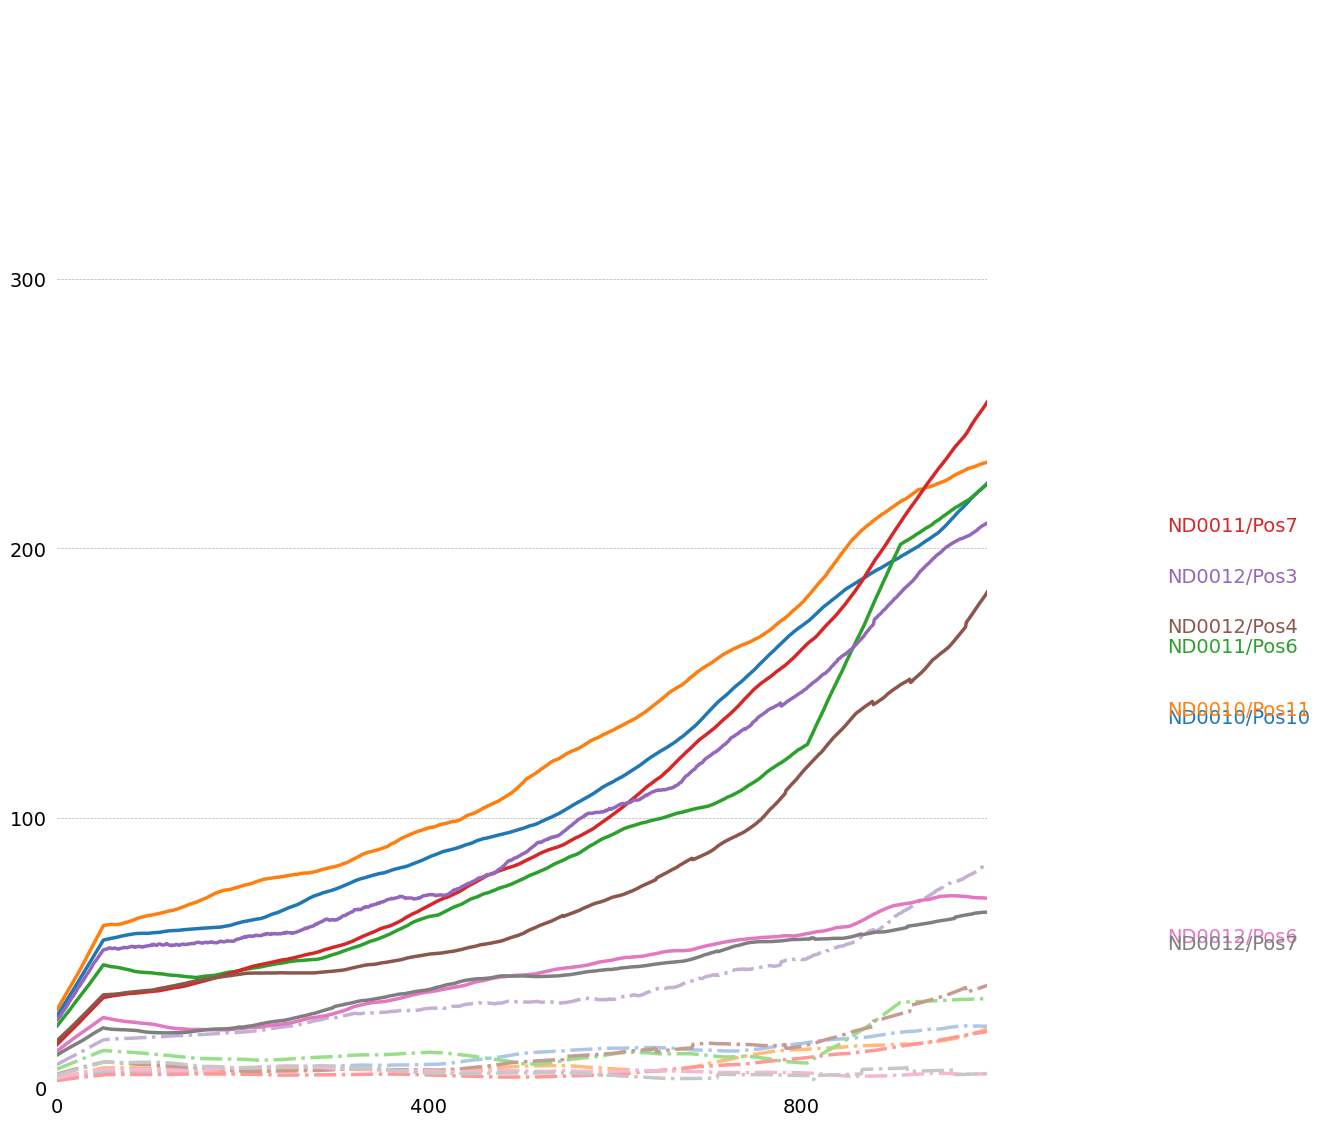

In [66]:
plt.clf()
fig, ax = plt.subplots(1,1, figsize = (12,14))
ax.set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])
ax.spines[:].set_visible(False)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.set_xlim(300, 1000)
ax.set_ylim(0, max_N_cell)
# # Set a fixed location and format for ticks.
ax.set_xticks(range(0, length, 400))
ax.set_yticks(range(0, max_N_cell, 100))
# # Use automatic StrMethodFormatter creation
# ax.xaxis.set_major_formatter('{x:.0f}')# frames')
# ax.yaxis.set_major_formatter('{x:.0f}')#' cells')
# # Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted. Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
ax.tick_params(axis='both', which='both', labelsize=14,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)
wt_count = []
for expt in cell_count_9010:
    if len(cell_count_9010[expt]['wt']) > 3000:
        continue
    #plt.plot(cell_count[expt]['wt'], label = f'wild-type cell count {expt}')
    #c = next(color)
    wt_count = []
    wt_count = movingaverage(cell_count_9010[expt]['wt'], 100)
    line, = ax.plot(wt_count, label = f'wt {expt}', lw = 2.5)# c=c)
    y_pos = movingaverage(cell_count_9010[expt]['wt'], 100)[-1] - 0.5
    ax.text(length, y_pos, expt, fontsize=14, color=line.get_color())
    #plt.plot(cell_count['ras'], label = 'Ras cell count')
   # c = next(color)
    ras_count = movingaverage(cell_count_9010[expt]['ras'], 100)
    line, = ax.plot(ras_count, lw = 2.5, ls = 'dashdot')# c=c)
    #ax.plot(movingaverage(cell_count[expt]['ras'], 100), label = f'ras {expt}',)# c=c, )
# plt.legend(loc = 'upper left', bbox_to_anchor=(1, 2))
plt.show()

In [41]:
len(wt_count)

22318

In [39]:
cell_count = pd.DataFrame(data=N)

In [40]:
cell_count

,wt,ras
0,38,13
1,41,14
2,36,13
3,40,13
4,29,12
...,...,...
2783,348,89
2784,357,90
2785,345,90
2786,357,89


In [44]:
import numpy as np

In [47]:
np.polyfit(cell_count['wt'], np.arange(0, len(cell_count['wt'])), 10)

array([  3.26607867, 468.18406454])

In [54]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')


In [55]:
y_av = movingaverage(cell_count['wt'], 10)


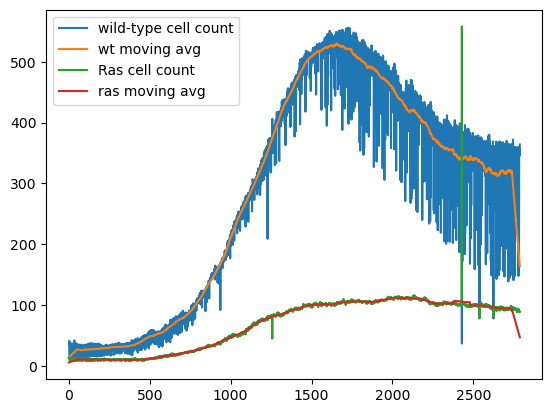

In [59]:
plt.clf()
plt.plot(cell_count['wt'], label = 'wild-type cell count')
plt.plot(movingaverage(cell_count['wt'], 100), label = 'wt moving avg')
plt.plot(cell_count['ras'], label = 'Ras cell count')
plt.plot(movingaverage(cell_count['ras'], 100), label = 'ras moving avg')
plt.legend(loc = 'upper left')
plt.show()

In [60]:
N = {'wild-type cells': [], 'ras cells': []}
cell_count = pd.DataFrame(data=N)

In [62]:
for n, i in enumerate(image_generator(mask_files[0:100])):
        count_gfp = nd.label(i == 1)[-1]
        count_rfp = nd.label(i == 2)[-1]
        cell_count['wild-type count'] = [n, nd.label(i == 1)[-1]]
        cell_count['ras count'] = [n, nd.label(i == 2)[-1]]

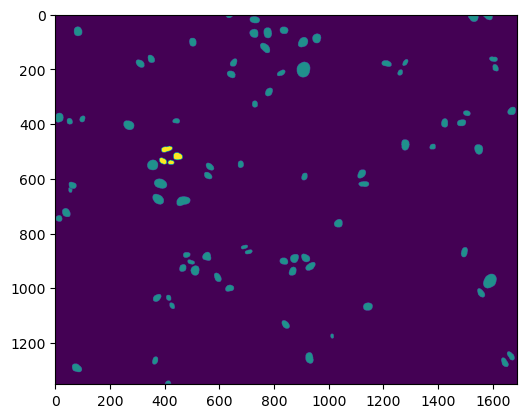

In [85]:
plt.imshow(i)
plt.show()

In [84]:
count_gfp, count_rfp

(338381, 9110)

In [56]:
len(gfp_objs)

2391

In [57]:
len(rfp_objs)

1188

# testing nd0010 pos3

### manually count each segment in each frame according to type

In [86]:
count_gfp, count_rfp = 0, 0

for i in image_generator(glob.glob('/home/nathan/data/kraken/ras/ND0010/Pos3/Pos3_images/*channel099*')):
        count_gfp += nd.label(i == 1)[-1]
        count_rfp += nd.label(i == 2)[-1]

# manual count

In [92]:
count_rfp

657125

# obj count from .h5

In [89]:
with btrack.dataio.HDF5FileHandler(
     '/home/nathan/data/kraken/ras/ND0010/Pos3/objects_type_1.h5', 'r', obj_type='obj_type_2',
) as hdf:
    rfp_objs = hdf.objects

[INFO][2022/02/03 08:01:01 pm] Opening HDF file: /home/nathan/data/kraken/ras/ND0010/Pos3/objects_type_1.h5...
[INFO][2022/02/03 08:01:02 pm] Loading objects/obj_type_2 (1184, 5) (1184 filtered: None)
[INFO][2022/02/03 08:01:02 pm] Closing HDF file: /home/nathan/data/kraken/ras/ND0010/Pos3/objects_type_1.h5


In [91]:
len(rfp_objs)

1184

# testing relocalisation nd10pos3

In [93]:
with btrack.dataio.HDF5FileHandler(
     '/home/nathan/data/kraken/ras/ND0010/Pos3/objects_type_2.h5', 'r', obj_type='obj_type_2',
) as hdf:
    rfp_objs = hdf.objects

[INFO][2022/02/04 09:56:33 am] Opening HDF file: /home/nathan/data/kraken/ras/ND0010/Pos3/objects_type_2.h5...
[INFO][2022/02/04 09:56:34 am] Loading objects/obj_type_2 (1184, 5) (1184 filtered: None)
[INFO][2022/02/04 09:56:34 am] Closing HDF file: /home/nathan/data/kraken/ras/ND0010/Pos3/objects_type_2.h5


In [96]:
len(rfp_objs), count_rfp

(1184, 657125)

In [102]:
[obj.t for obj in rfp_objs][-1]

1188

In [103]:
len(glob.glob('/home/nathan/data/kraken/ras/ND0010/Pos3/Pos3_images/*channel099*'))

1189

In [109]:
from skimage.io import imshow, imread

In [108]:
glob.glob('/home/nathan/data/kraken/ras/ND0010/Pos3/Pos3_images/*channel099*')[500]

'/home/nathan/data/kraken/ras/ND0010/Pos3/Pos3_images/img_channel099_position003_time000000040_z000.tif'

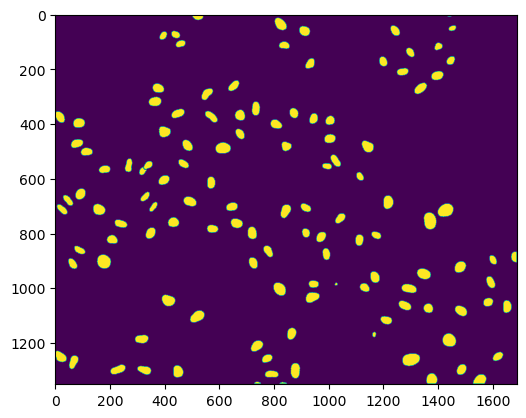

In [115]:
plt.clf()
plt.imshow(imread(glob.glob('/home/nathan/data/kraken/ras/ND0010/Pos3/Pos3_images/*channel099*')[500]))
plt.show()